### データの読み込み
---

In [1]:
from src.preparation.load import get_data, create_data 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
url_list, anno_list = get_data()
img_list, anno_list = create_data(url_list, anno_list)
print(len(img_list), len(anno_list))

101 101


### 画像の可視化
---

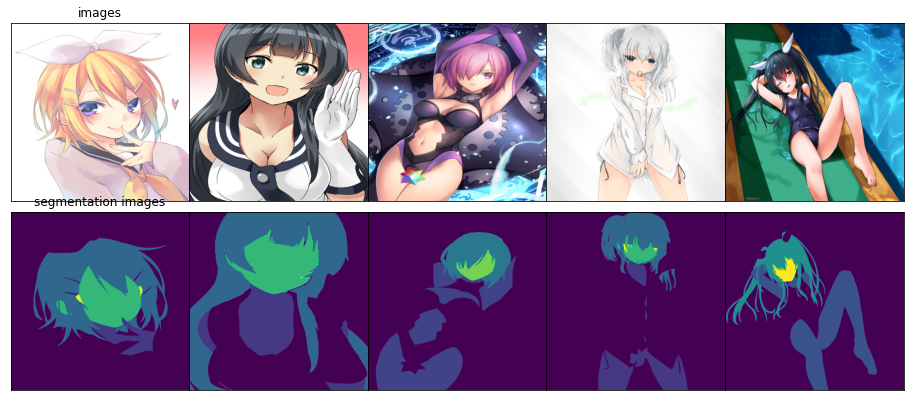

In [18]:
def show_img(idx: int, img_list: List[Any], anno_list: List[Any]):
    fig, axes = plt.subplots(2, idx, figsize=(16, 6))
    ax = axes.ravel()
    for i in range(idx):
        a = np.random.randint(0, len(img_list), 1)[0]
        ax[i].imshow(img_list[a].resize((2160, 2160)))
        ax[i+idx].imshow(np.array(anno_list[a].resize((2160, 2160))))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i+idx].set_xticks([])
        ax[i+idx].set_yticks([])
        if i == 0:
            ax[i].set_title("images")
            ax[i+idx].set_title("segmentation images")
    plt.subplots_adjust(wspace=0, hspace=0, top=1.0)
    plt.show()
    
show_img(5, img_list, anno_list)    

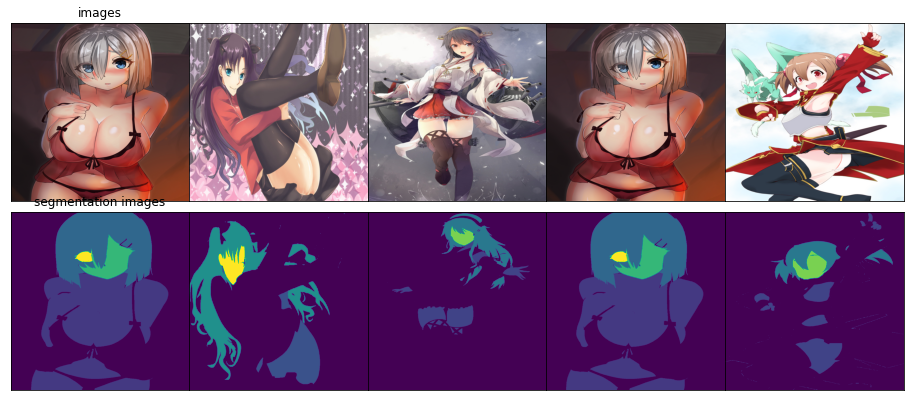

In [19]:
show_img(5, img_list, anno_list)

### 前処理  
---

In [3]:
from src.processing.prep import transform, train_val_split
from src.processing.save import save_pkl

In [4]:
train, val = train_val_split(img_list, anno_list)

train: 134 val: 58
---
torch.Size([8, 3, 475, 475])
torch.Size([8, 475, 475])
tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]],

        [[-1.0000, -1.0000, -1.0000,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


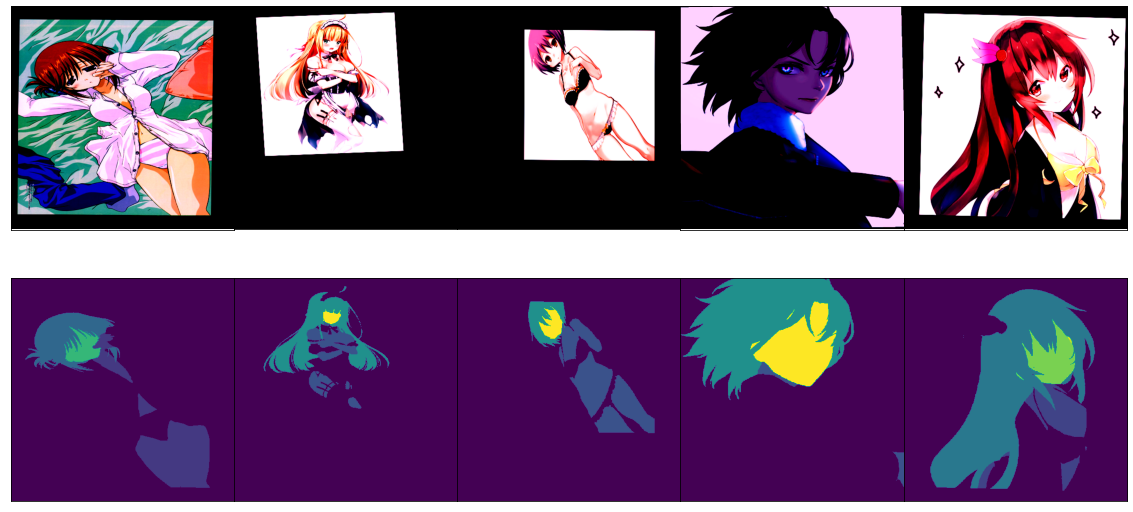

In [5]:
def show_prep_img(img_list, anno_list):
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    ax = axes.ravel()
    for i in range(5):
        img = img_list[i].permute(1, 2, 0)
        ann = anno_list[i]
        ax[i].imshow(img)
        ax[i+5].imshow(ann)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i+5].set_xticks([])
        ax[i+5].set_yticks([])
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
for r in train:
    sample_img = r["input"]
    sample_ann = r["label"]
    break 
    
show_prep_img(sample_img, sample_ann)
    

In [6]:
save_pkl(train, "train")
save_pkl(val, "val")